In [1]:
from top2vec import Top2Vec
from bs4 import BeautifulSoup
import pandas as pd


In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('crossref_data.csv')

# Inspect the first few rows and columns
print(df.head())
print(df.columns)

                          DOI  \
0  10.1007/s43681-024-00521-7   
1  10.1007/s43681-023-00315-3   
2        10.2139/ssrn.4784555   
3  10.1007/s43681-024-00519-1   
4     10.1201/9781032654829-2   

                                               Title  \
0  Ethics and the use of generative AI in profess...   
1  Does the sun rise for ChatGPT? Scientific disc...   
2  The Ethics of Generative Ai in Social Science ...   
3  A powerful potion for a potent problem: transf...   
4  Generative Artificial Intelligence: Introducti...   

                                            Abstract  
0  <jats:title>Abstract</jats:title><jats:p>Gener...  
1                                                NaN  
2                                                NaN  
3  <jats:title>Abstract</jats:title><jats:p>Gener...  
4                                                NaN  
Index(['DOI', 'Title', 'Abstract'], dtype='object')


In [3]:
# Remove rows where 'Abstract' column has the value 'N/A'
df = df[~df['Abstract'].isin(['N/A']) & df['Abstract'].notna()]

In [4]:
# Define the cleaning function
def clean_html_xml(text):
    # Create a BeautifulSoup object to parse the HTML/XML
    soup = BeautifulSoup(text, 'html.parser')
    # Extract and return text without HTML/XML tags
    return soup.get_text()

In [5]:
df['cleaned_text'] = df['Abstract'].apply(clean_html_xml)

In [6]:
# remove stop words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(stop_words="english")

In [7]:
df.head()

,DOI,Title,Abstract,cleaned_text
0,10.1007/s43681-024-00521-7,Ethics and the use of generative AI in profess...,<jats:title>Abstract</jats:title><jats:p>Gener...,AbstractGenerative artificial intelligence (Gn...
3,10.1007/s43681-024-00519-1,A powerful potion for a potent problem: transf...,<jats:title>Abstract</jats:title><jats:p>Gener...,AbstractGenerative Artificial Intelligence (AI...
5,10.4018/979-8-3693-8557-9.ch009,Generative AI for Cybersecurity,<jats:p>The intersection of cybersecurity and ...,The intersection of cybersecurity and generati...
10,10.4018/979-8-3693-8557-9.ch002,Generative AI,"<jats:p>For nearly 50 years, artificial intell...","For nearly 50 years, artificial intelligence (..."
13,10.1007/s43681-024-00443-4,AI hype as a cyber security risk: the moral re...,<jats:title>Abstract</jats:title><jats:p>This ...,AbstractThis paper examines the ethical obliga...


In [8]:
documents = df['cleaned_text'].tolist()


In [12]:
model = Top2Vec(documents, embedding_model='universal-sentence-encoder')

2024-10-11 16:31:54,241 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-10-11 16:31:54,667 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2024-10-11 16:32:47,361 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-10-11 16:32:48,775 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-10-11 16:32:53,198 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-10-11 16:32:53,441 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [17]:
print(model.documents)
print(model.topic_words)


['AbstractGenerative artificial intelligence (GnAI) has garnered significant attention worldwide across diverse industries, including in book publishing. To date, more attention has been paid to its potential in creative collaboration and less to the editorial possibilities of its application. Interest has accelerated since the breakthrough of a new Large Language Model in late 2022. This paper engages with the ethical and industrial implications of using GnAI in a creative context, namely literary publishing. It raises crucial questions about intellectual property, trust, the author–editor relationship and publishing professionals’ evolving roles in shaping quality literature. Using a published story as a test case, we compare edits using GnAI with those by professional editors over multiple drafts and at different stages of editorial development. We consider the potential ethical implications of the use of GnAI in literary fiction editing, highlighting the principles and practices th

In [23]:
num_topics = model.get_num_topics()
print(f"Number of topics: {num_topics}")


Number of topics: 8


In [27]:
topics = model.get_topics(8)
print(topics)


(array([['ethics', 'ai', 'ethical', 'normative', 'robots', 'algorithmic',
        'algorithms', 'cybersecurity', 'against', 'neural', 'autonomous',
        'chatbots', 'chatbot', 'human', 'technological', 'technologies',
        'cognitive', 'theoretical', 'computational', 'generative',
        'robot', 'moral', 'sustainability', 'developed', 'humans',
        'adversarial', 'cyber', 'gpt', 'proposes', 'biases', 'concludes',
        'methodology', 'conceptual', 'discusses', 'technology',
        'automated', 'plagiarism', 'advanced', 'principles',
        'artificial', 'experts', 'synthetic', 'innovative', 'concerns',
        'implications', 'advances', 'risk', 'debate', 'examining',
        'addressing'],
       ['ai', 'learners', 'chatbot', 'chatbots', 'teaching', 'educators',
        'neural', 'literacy', 'generative', 'robots', 'normative',
        'algorithms', 'algorithmic', 'educational', 'academic',
        'cybersecurity', 'technologies', 'advanced', 'autonomous',
        'eth

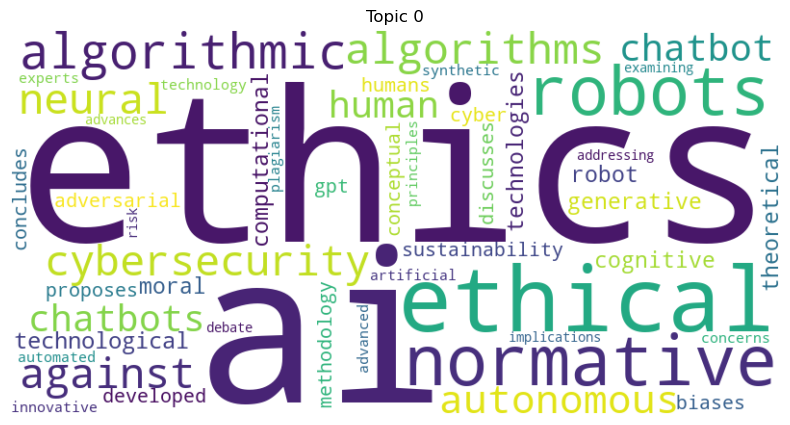

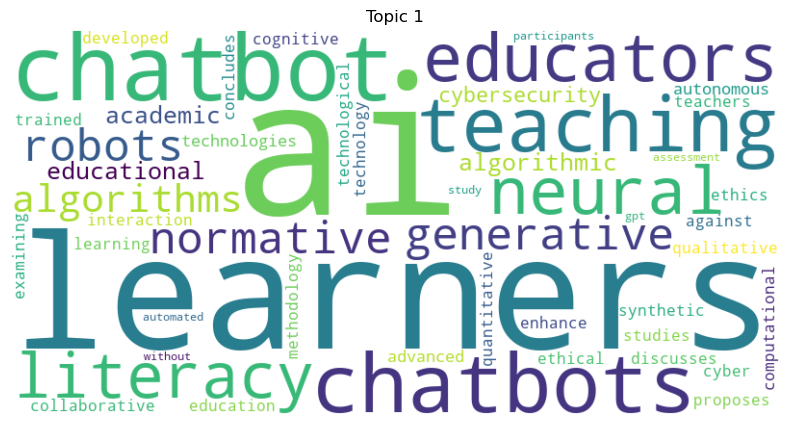

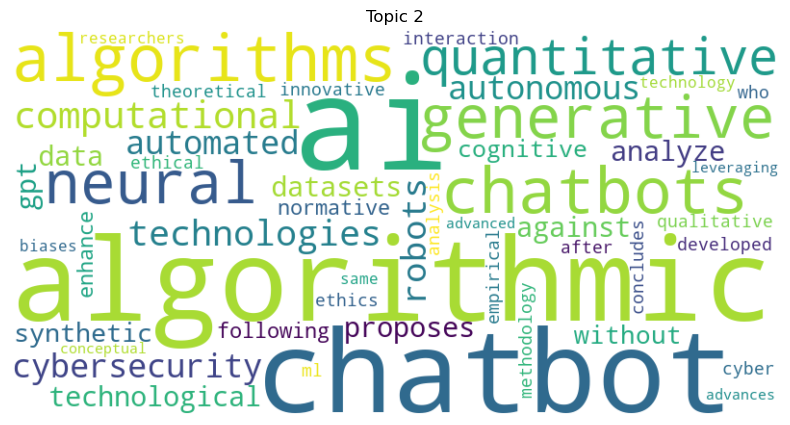

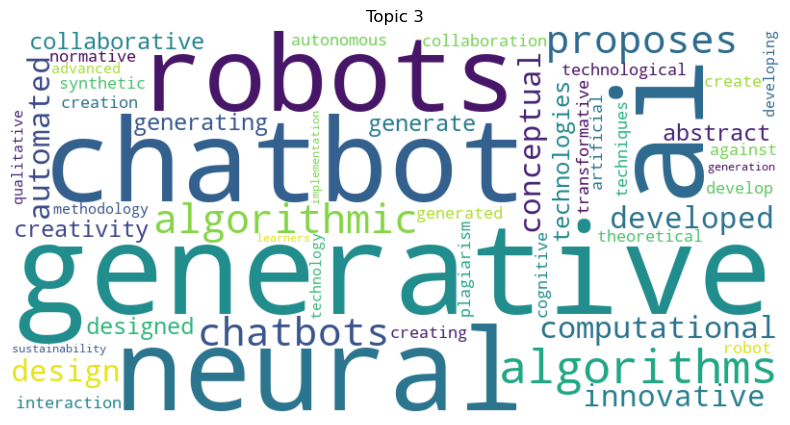

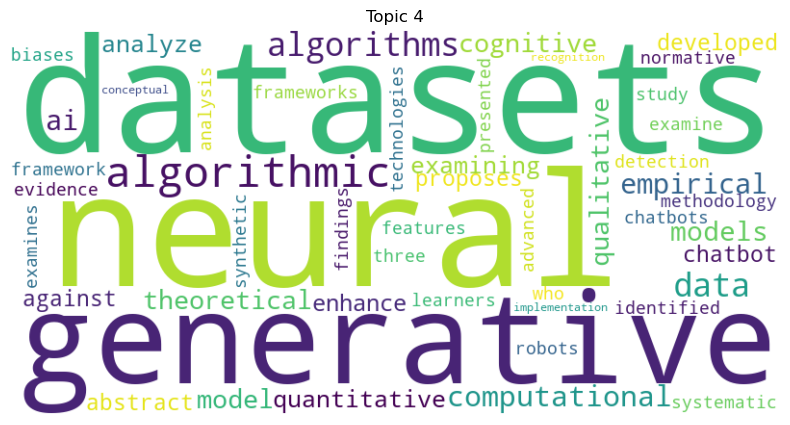

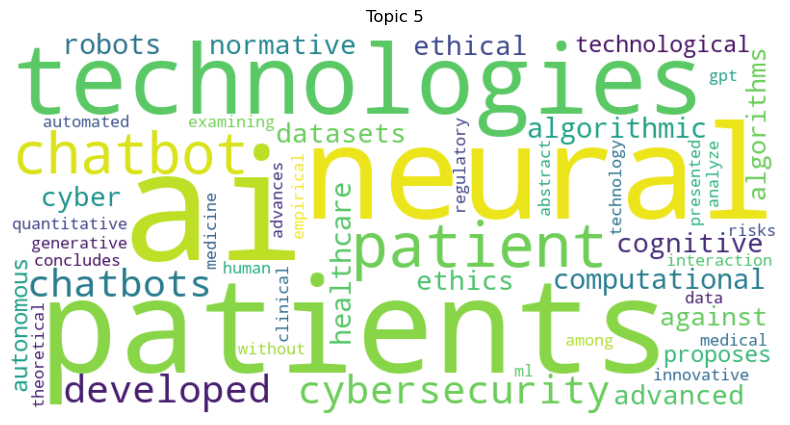

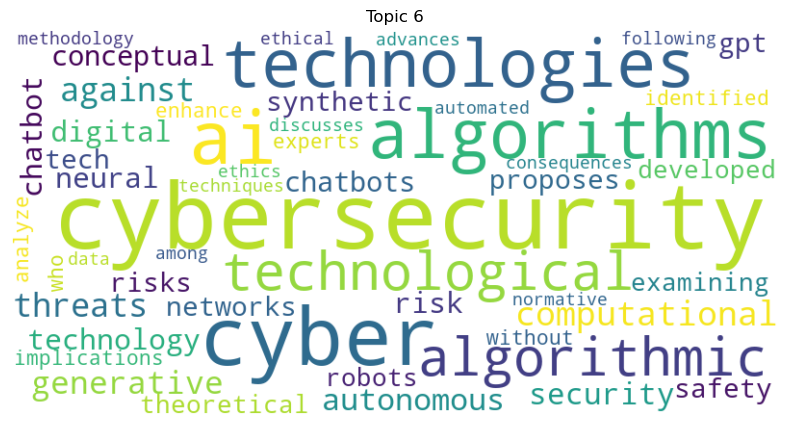

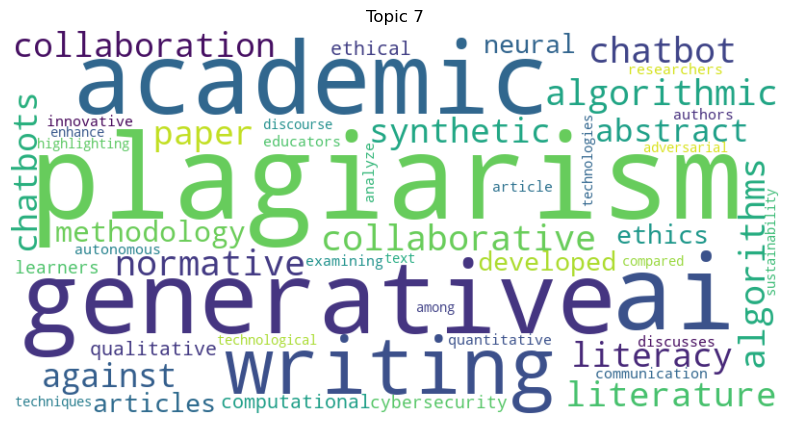

In [28]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Function to generate word cloud for a topic
def generate_word_cloud(topic_words, word_scores, topic_num):
    word_freq = {word: score for word, score in zip(topic_words[topic_num], word_scores[topic_num])}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_num}')
    plt.show()

# Generate word clouds for all topics
for i in range(num_topics):
    generate_word_cloud(topic_words, word_scores, i)